# **Implementation of Decision Trees for Classification**

The goal of this problem is to predict the number of occupants in a room using data obtained from multiple non-intrusive environmental sensors like temperature, light, sound, CO2, and passive infrared (PIR).
1. **Algorithm to be used**: Decision Trees
2. **Dataset**: `Occupancy Estimation.csv`

Following is the description of columns in `Occupancy Estimation.csv` file:
<TABLE CAPTION="Room Occupancy">
<TR><TD><B>Name</B></TD><TD><B>Description</B></TD></TR>
<TR><TD>Temperature</TD><TD>In degree Celsius</TD></TR>
<TR><TD>Light</TD><TD>In Lux</TD></TR>
<TR><TD>Sound</TD><TD>In Volts</TD></TR>
<TR><TD>CO2</TD><TD>In PPM</TD></TR>
<TR><TD>CO2 Slope</TD><TD>Slope of CO2 values taken in a sliding window</TD></TR>
<TR><TD>PIR</TD><TD>Binary value conveying motion detection</TD></TR>   
<TR><TD>Room Occupancy Count (outcome)</TD><TD>Number of occupants in the room</TD></TR>
</TABLE>

Sensor nodes S1-S4 consist of temperature, light and sound sensors, S5 has a CO2 sensor and S6 and S7 have one PIR sensor each that are deployed on the ceiling ledges at an angle that maximize the sensor field of view for motion detection.

In [4]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
#import DecisionTreeRegressor for regression, this is for classification

# Package to visualize Decision Tree
from sklearn import tree

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report, generates all the metrics for classification
from sklearn.metrics import classification_report

%matplotlib inline

1. Import `Occupancy Estimation.csv` file and check if the dataset is balanced/imbalanced with respect to the target variable (Room Occupancy Count).

In [5]:
room = pd.read_csv('Occupancy_Estimation.csv')

In [6]:
room.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


2. With Room Occupancy Count as the outcome, implement a Decision Tree model using hold-out sampling approach. Consider test data size to be 40%.

In [7]:
X = room.drop(columns=['Room_Occupancy_Count'])
y = room['Room_Occupancy_Count']

In [8]:
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [11]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

In [12]:
room['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

3. Generate a visualization of the decision tree model for this case.

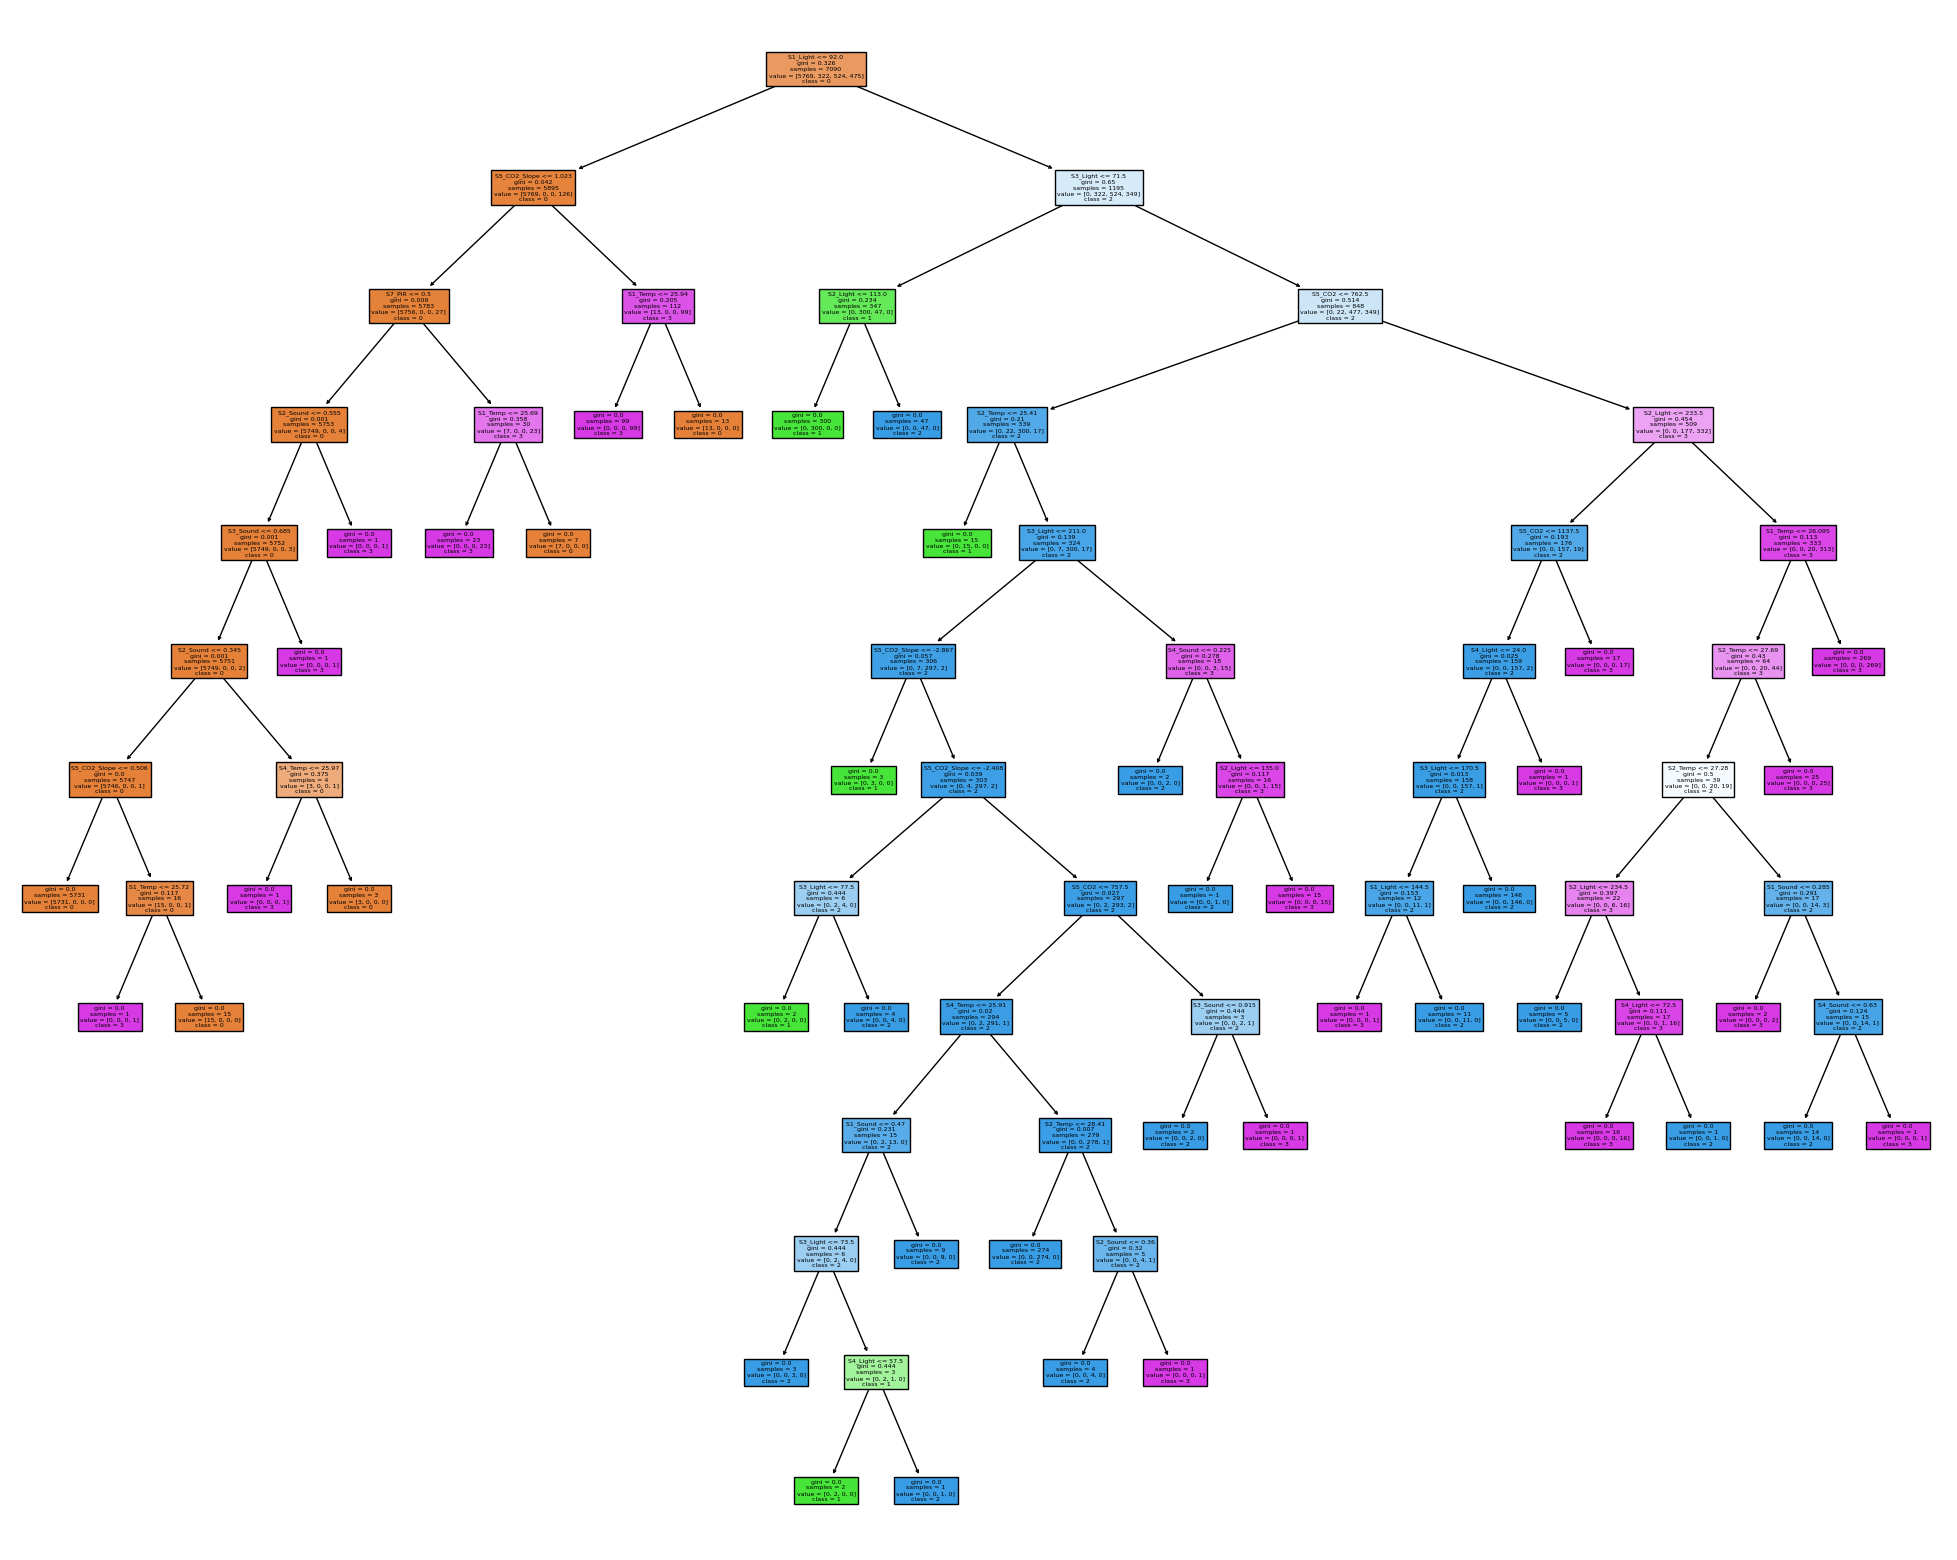

In [14]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = ['0', '1', '2', '3'],
                   filled = True)

In [15]:
# Saving Decision Tree
fig.savefig("room_decision_tree.pdf", bbox_inches='tight')

4. Evaluate your model’s performance both on train and test sets using confusion matrices and classification reports.

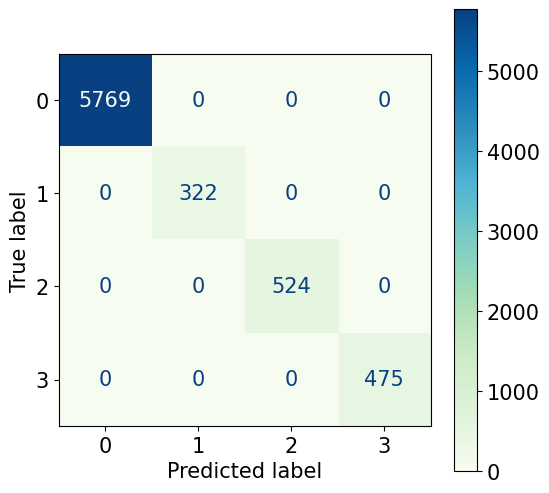

In [18]:
# Predictions on train set
y_pred_train = clf.predict(train_X)

# Confusion matrix
cm = confusion_matrix(train_y, y_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))
plt.rcParams.update({'font.size': 15})

# Confusion Matrix
disp.plot(cmap = 'GnBu', ax = ax);

Since this is our training data set that we fit the model to, we would expect for the predictions to be perfect. However, we really want to pay attention to the confusion matrix for our testing data to see if we possibly overfit (since we have a very large and complicated tree).

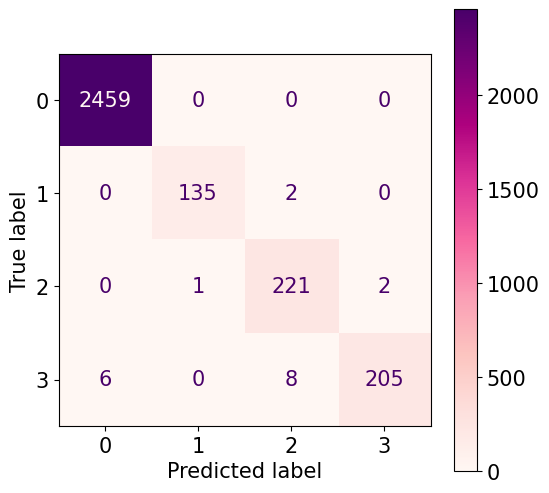

In [19]:
# Predictions on train set
y_pred_test = clf.predict(test_X)

# Confusion matrix
cm = confusion_matrix(test_y, y_pred_test, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))
plt.rcParams.update({'font.size': 15})

# Confusion Matrix
disp.plot(cmap = 'RdPu', ax = ax);

Our confusion matrix shows that the model performed relatively well with the testing data. This could be because even though we have a very complicated model, the training and testing data sets are very similar.


5. Estimate prediction probabilities for each instance in test set and store the results in a dataframe.

In [21]:
# Generating Classification Report
print("Classification Report - \n",
      classification_report(test_y, y_pred_test))

Classification Report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2459
           1       0.99      0.99      0.99       137
           2       0.96      0.99      0.97       224
           3       0.99      0.94      0.96       219

    accuracy                           0.99      3039
   macro avg       0.98      0.98      0.98      3039
weighted avg       0.99      0.99      0.99      3039



In [22]:
# Printing prediction results
result = pd.DataFrame({'Predicted': y_pred_test, 'Actual': test_y})
display(result.head(20))

,Predicted,Actual
8164,3,3
9015,0,0
2053,0,0
5757,0,0
3986,0,0
4186,0,0
4151,0,0
2205,0,0
6950,0,0
4360,0,0


In [24]:
# Getting prediction probabilites
prob = clf.predict_proba(test_X)

# Printing prediction results
result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred_test})

# Creating columns for rejection and acceptance prob.
result[['Prob of None (0)','Prob. of 1 (1)', 'Prob of 2 (2)', 'Prob of 3 (3)']] = pd.DataFrame(prob.tolist(), index = result.index)

display(result.tail(20))
# Saving dataframe as a csv file
result.to_csv('Prediction Results.csv', index = False)

,Actual,Predicted,Prob of None (0),Prob. of 1 (1),Prob of 2 (2),Prob of 3 (3)
4352,0,0,1.0,0.0,0.0,0.0
5830,0,0,1.0,0.0,0.0,0.0
2326,0,0,1.0,0.0,0.0,0.0
9903,0,0,1.0,0.0,0.0,0.0
2461,0,0,1.0,0.0,0.0,0.0
1512,0,0,1.0,0.0,0.0,0.0
8056,0,0,1.0,0.0,0.0,0.0
9647,0,0,1.0,0.0,0.0,0.0
3300,1,1,0.0,1.0,0.0,0.0
6333,0,0,1.0,0.0,0.0,0.0


In [25]:
importance = clf.feature_importances_

feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

,Feature,Importance
0,S1_Light,0.558004
1,S3_Light,0.124014
2,S2_Light,0.107929
3,S5_CO2_Slope,0.076594
4,S5_CO2,0.070945
5,S1_Temp,0.019772
6,S2_Temp,0.017431
7,S7_PIR,0.015156
8,S4_Light,0.002241
9,S4_Sound,0.002160


6. Generate a dataframe and a bar plot to show the importance of input features in occupancy estimation.

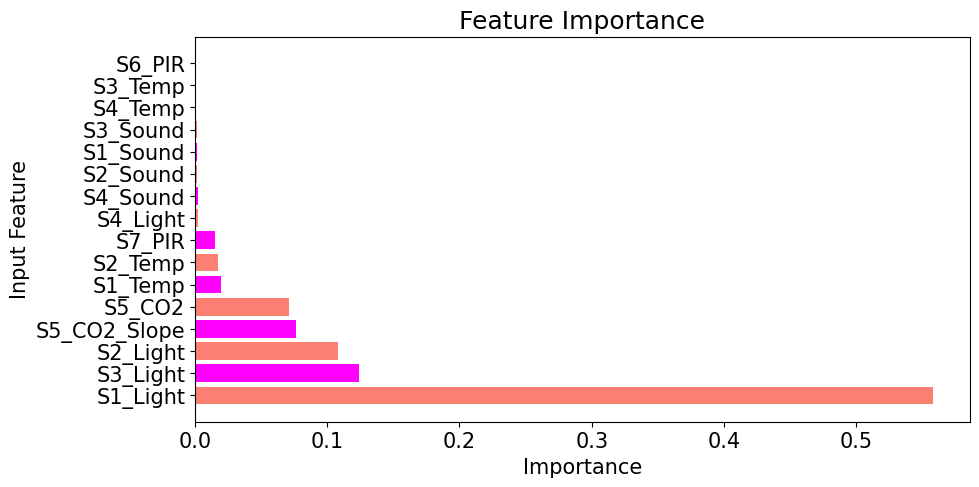

In [30]:
plt.figure(figsize=(10, 5), dpi = 100)
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['salmon', 'magenta'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");

Light is a very important predictor for our classification model. This could be because maybe if there are more people there are more shadows cast around the room which would affect the overall ambiance and vibe of the occupants' stay. CO2 and CO2 slope we would expect to see because more breathing and more CO2 emitted could be associated with more people in the room.